In [1]:
import os
import zipfile
import pandas as pd

df = pd.read_csv("/mnt/c/Users/Ahmed/OneDrive/Desktop/Internship/ml/pima_data/diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Dataset Shape: (768, 9)

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0

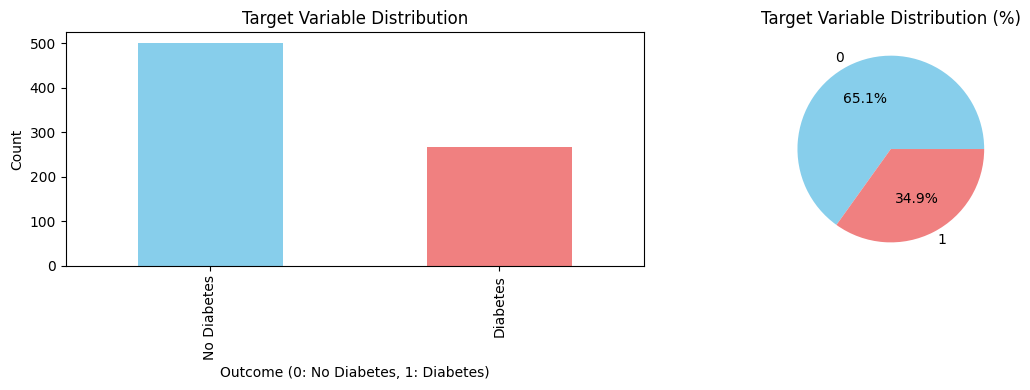

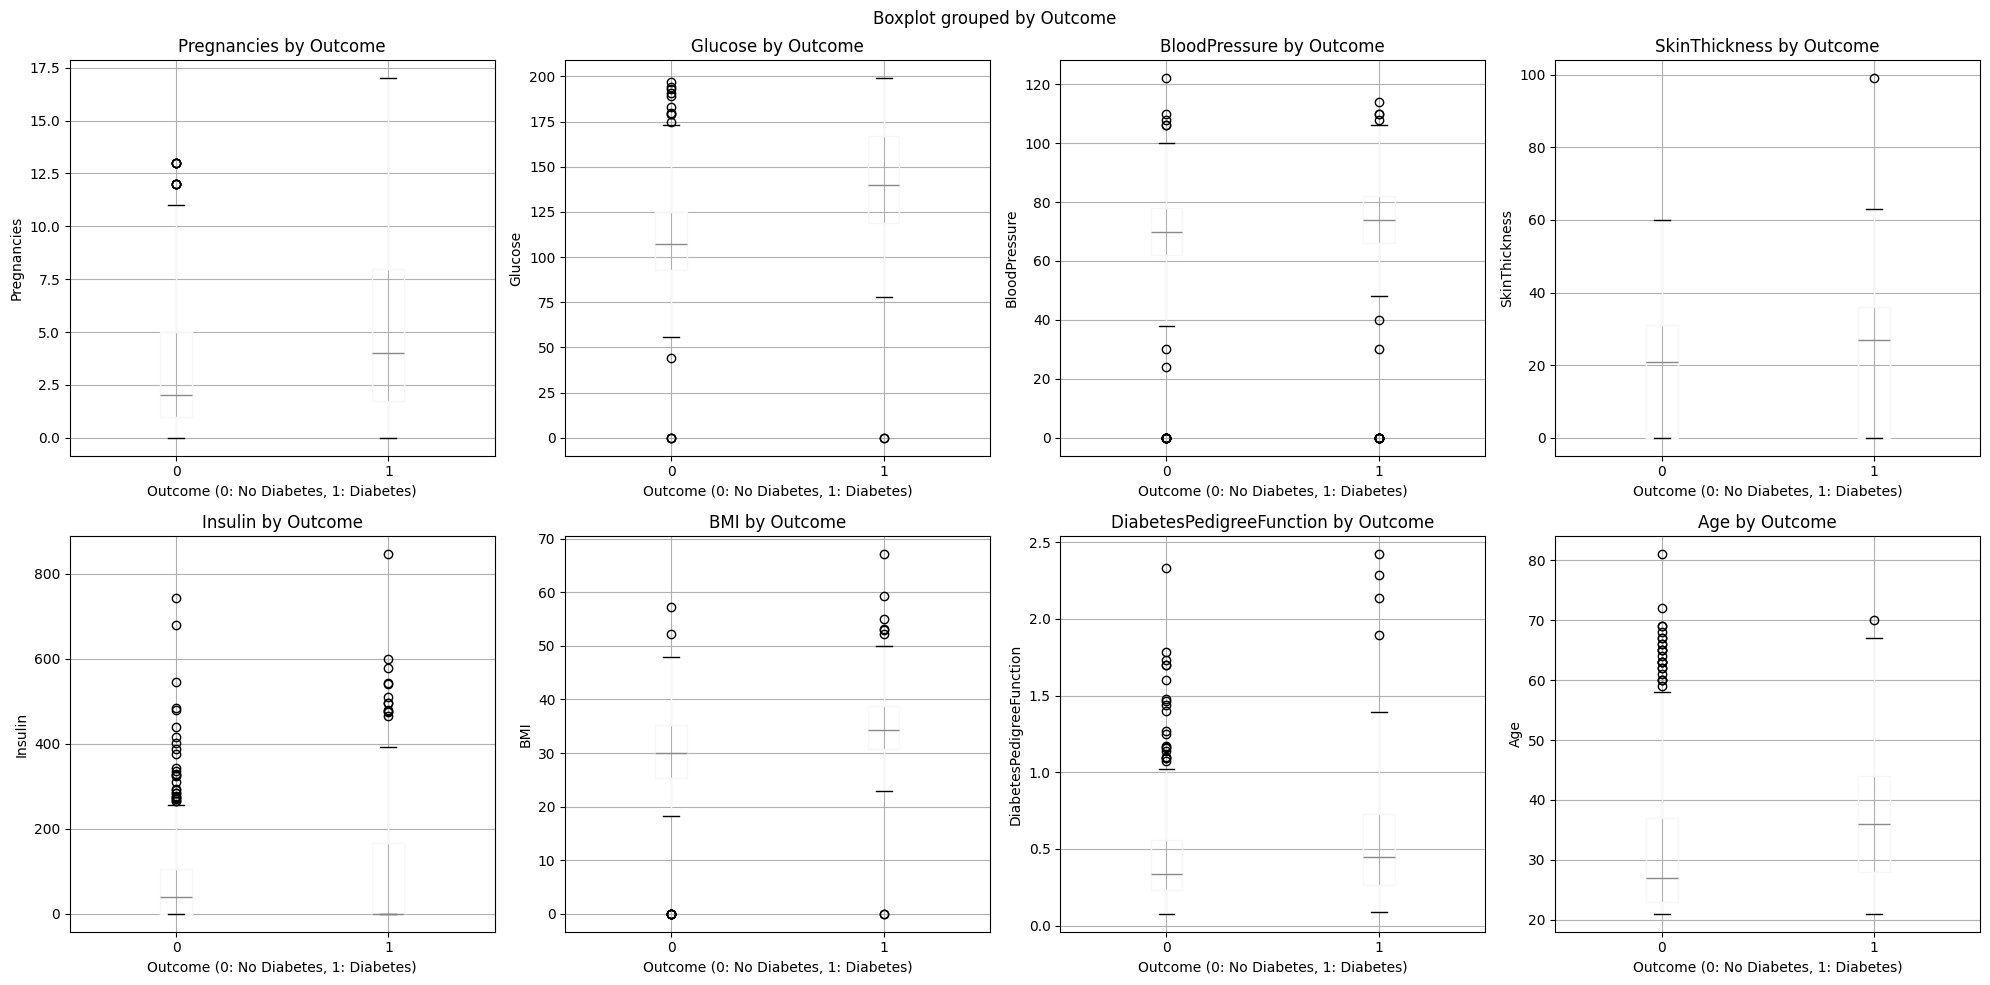

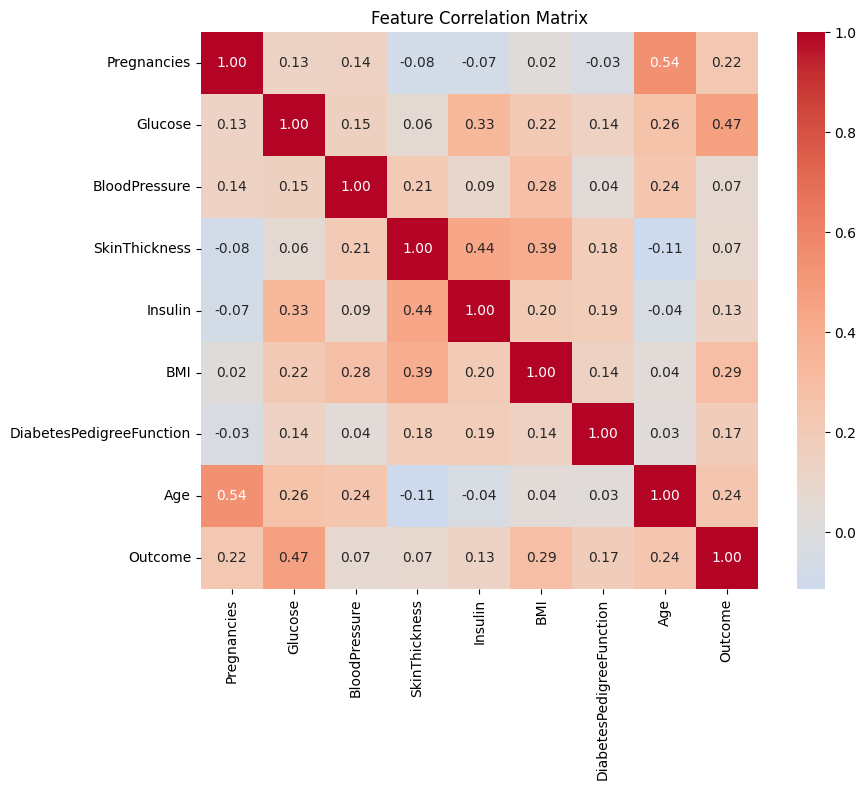

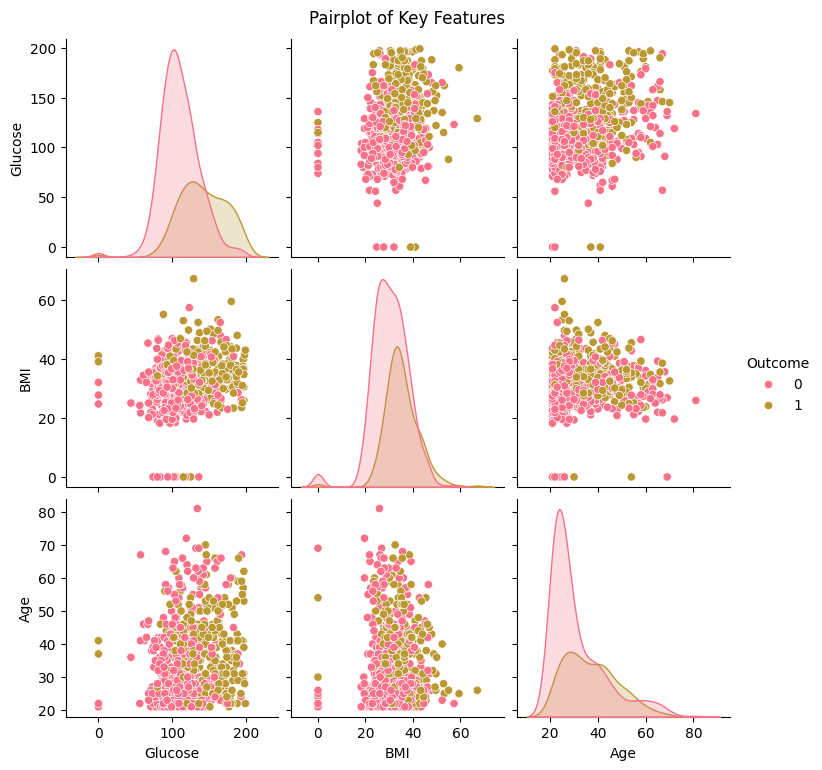

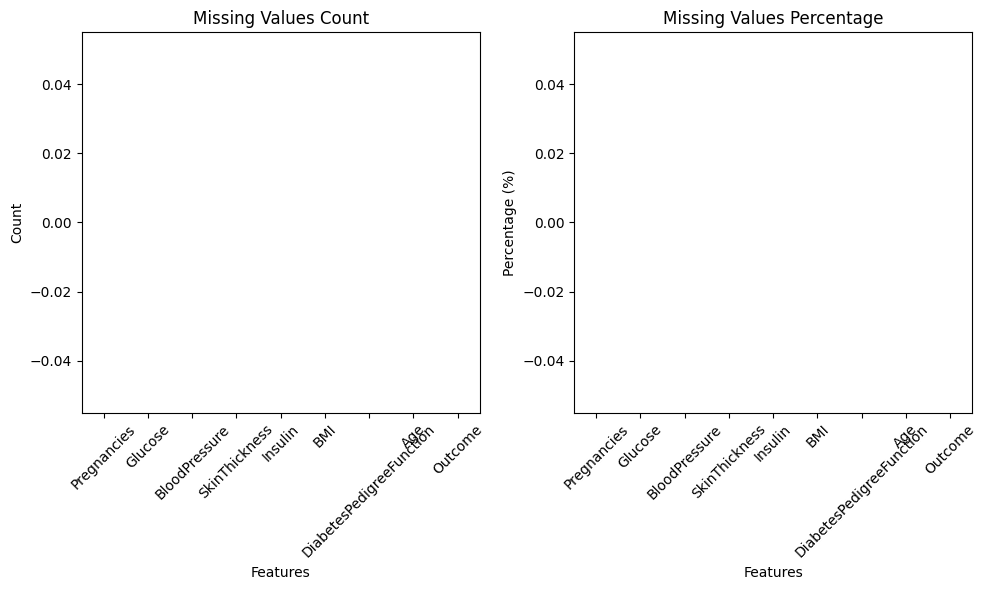

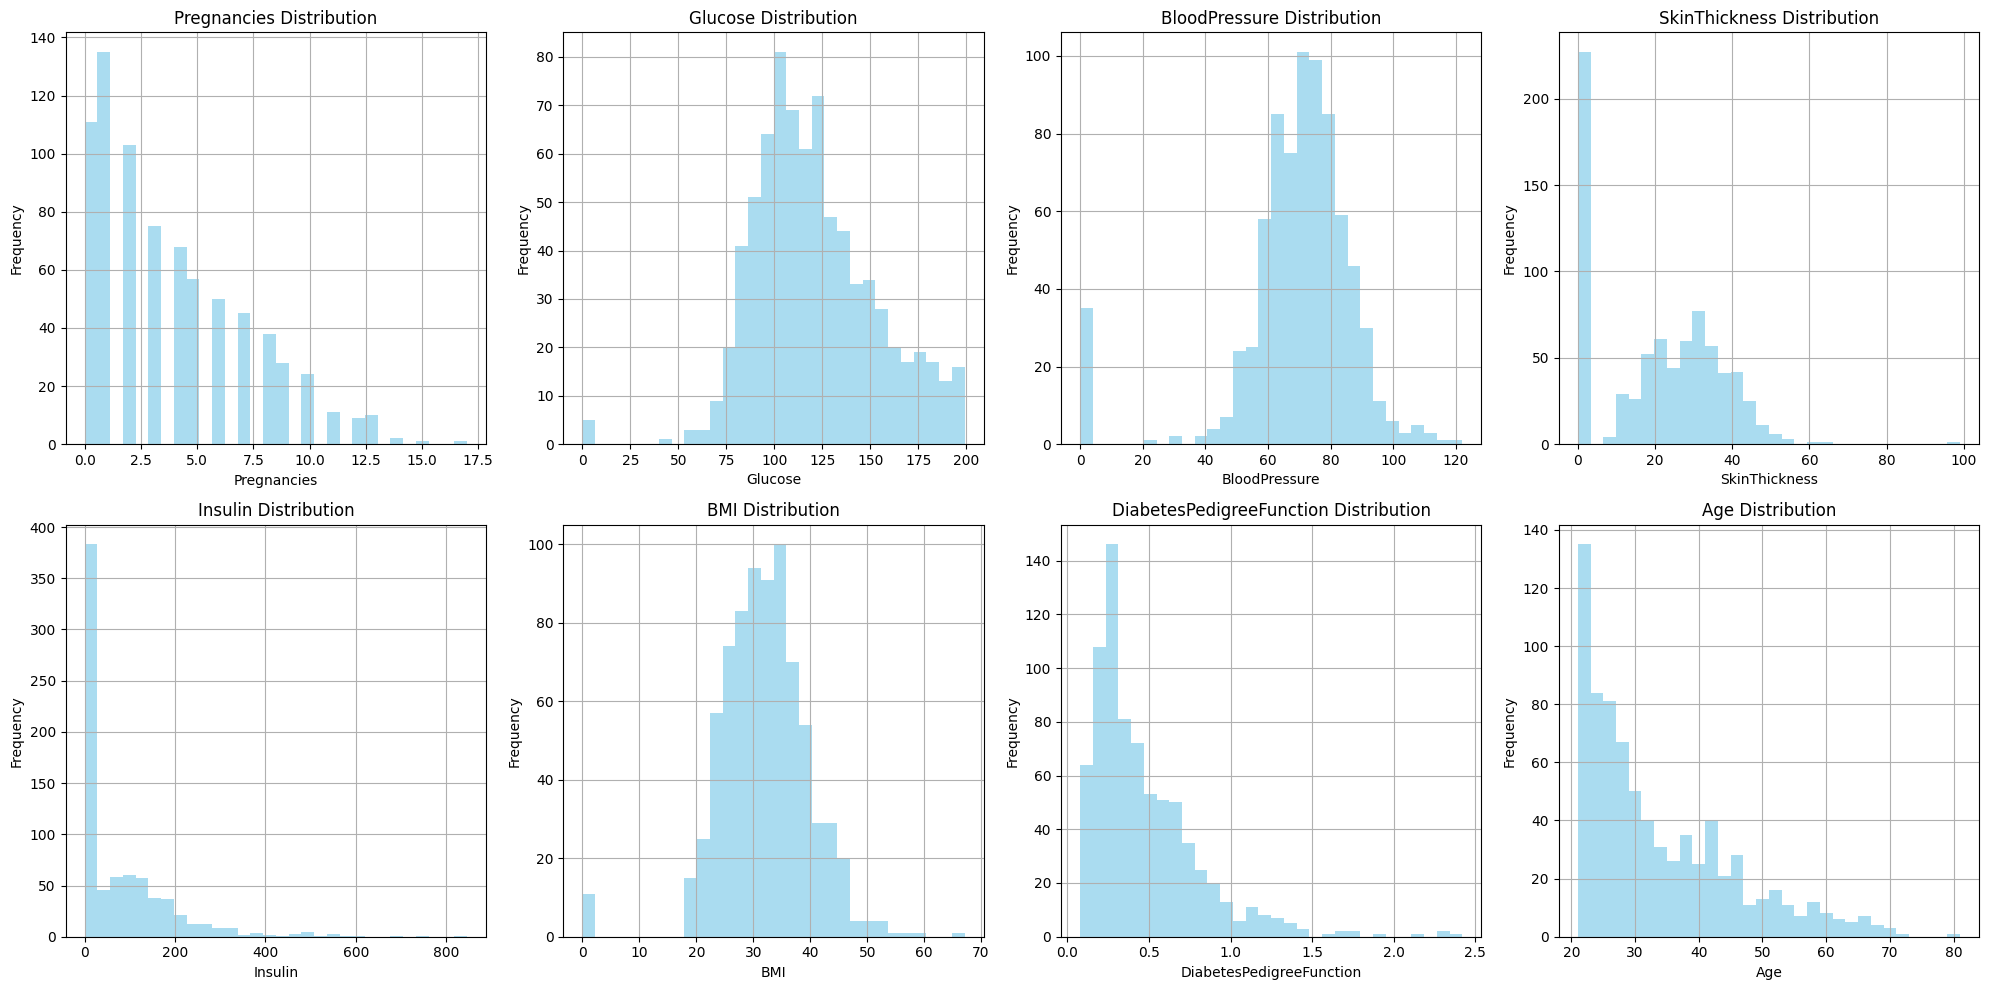


Summary Statistics by Outcome:
        Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        109.980000  ...                  0.56175  2.329  500.0  31.190000   
1        141.257463  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  23.0  2

In [25]:
# Exploratory Data Analysis - Before Preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# 1. Basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nDataset Shape:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum())

# 2. Statistical summary
print("\nStatistical Summary:")
print(df.describe())

# 3. Target variable distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Target Variable Distribution')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

plt.subplot(1, 2, 2)
df['Outcome'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', 
                                                colors=['skyblue', 'lightcoral'])
plt.title('Target Variable Distribution (%)')
plt.ylabel('')

plt.tight_layout()
plt.show()

# 4. Feature distributions by target
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    # Create subplot for each feature
    df.boxplot(column=feature, by='Outcome', ax=axes[i])
    axes[i].set_title(f'{feature} by Outcome')
    axes[i].set_xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

# 5. Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# 6. Pairplot for key features
key_features = ['Glucose', 'BMI', 'Age', 'Outcome']
sns.pairplot(df[key_features], hue='Outcome', diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

# 7. Missing values visualization
plt.figure(figsize=(10, 6))
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

plt.subplot(1, 2, 1)
missing_data.plot(kind='bar')
plt.title('Missing Values Count')
plt.xlabel('Features')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
missing_percentage.plot(kind='bar')
plt.title('Missing Values Percentage')
plt.xlabel('Features')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 8. Distribution of numerical features
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    df[feature].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue')
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 9. Summary statistics by outcome
print("\nSummary Statistics by Outcome:")
print(df.groupby('Outcome')[features].describe())

# 10. Check for outliers using IQR method
print("\nOutlier Detection (IQR method):")
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"{feature}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features_to_impute = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
other_features = [col for col in df.columns if col not in features_to_impute + ['Outcome']]

impute_scale_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('imp_features', impute_scale_pipeline, features_to_impute),
    ('pass_features', 'passthrough', other_features)
])

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_final, y_train)
y_pred = rf.predict(X_test_final)

print("rf_normal_accuracy:",accuracy_score(y_test, y_pred))
print("rf_normal_recall:",recall_score(y_test, y_pred))
print("rf_normal_precision:",precision_score(y_test, y_pred))
print("rf_normal_f1:",f1_score(y_test, y_pred))
print("rf_normal_confusion_matrix:",confusion_matrix(y_test, y_pred))

rf_normal_accuracy: 0.7467532467532467
rf_normal_recall: 0.6545454545454545
rf_normal_precision: 0.6428571428571429
rf_normal_f1: 0.6486486486486487
rf_normal_confusion_matrix: [[79 20]
 [19 36]]


In [4]:
from sklearn.model_selection import cross_val_score
import optuna
def objective_rf_recall(trial):
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 2, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_float('max_features', 0.3, 1.0),
        'bootstrap': bootstrap,
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced', 'balanced_subsample']),
    }

    if bootstrap:
        params['max_samples'] = trial.suggest_float('max_samples', 0.5, 1.0)

    rf_clf = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    score = cross_val_score(rf_clf, X_train_final, y_train, cv=5, scoring='recall').mean()
    return score

def objective_rf_accuracy(trial):
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 2, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_float('max_features', 0.3, 1.0),
        'bootstrap': bootstrap,
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced', 'balanced_subsample']),
    }

    if bootstrap:
        params['max_samples'] = trial.suggest_float('max_samples', 0.5, 1.0)

    rf_clf = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    score = cross_val_score(rf_clf, X_train_final, y_train, cv=5, scoring='accuracy').mean()
    return score

def objective_rf_f1(trial):
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 2, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_float('max_features', 0.3, 1.0),
        'bootstrap': bootstrap,
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced', 'balanced_subsample']),
    }

    if bootstrap:
        params['max_samples'] = trial.suggest_float('max_samples', 0.5, 1.0)

    rf_clf = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    score = cross_val_score(rf_clf, X_train_final, y_train, cv=5, scoring='f1').mean()
    return score

In [5]:
study_rf_accuracy = optuna.create_study(direction="maximize")
study_rf_accuracy.optimize(objective_rf_accuracy, n_trials=150)
best_rf_params_accuracy = study_rf_accuracy.best_params
print("Best Parameters:", study_rf_accuracy.best_params)

[I 2025-07-21 14:17:45,021] A new study created in memory with name: no-name-7d1966dd-ecb0-4090-99dd-508967ec1c9d
[I 2025-07-21 14:17:47,745] Trial 0 finished with value: 0.744315607090497 and parameters: {'bootstrap': False, 'n_estimators': 144, 'max_depth': 10, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 0.9906591584689937, 'criterion': 'gini', 'class_weight': None}. Best is trial 0 with value: 0.744315607090497.
[I 2025-07-21 14:17:50,597] Trial 1 finished with value: 0.7475809676129548 and parameters: {'bootstrap': False, 'n_estimators': 158, 'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 9, 'max_features': 0.9645893573623323, 'criterion': 'gini', 'class_weight': 'balanced_subsample'}. Best is trial 1 with value: 0.7475809676129548.
[I 2025-07-21 14:17:53,244] Trial 2 finished with value: 0.7589364254298281 and parameters: {'bootstrap': True, 'n_estimators': 118, 'max_depth': 26, 'min_samples_split': 11, 'min_samples_leaf': 10, 'max_features': 0.89

Best Parameters: {'bootstrap': True, 'n_estimators': 186, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 0.7804323272311695, 'criterion': 'entropy', 'class_weight': None, 'max_samples': 0.5683954418490895}


In [6]:
study_rf_recall = optuna.create_study(direction="maximize")
study_rf_recall.optimize(objective_rf_recall, n_trials=150)
best_rf_params_recall = study_rf_recall.best_params
print("Best Parameters:", study_rf_recall.best_params)

[I 2025-07-21 14:34:23,929] A new study created in memory with name: no-name-80d04274-818a-4bd9-8e51-9f2f12b2fd07
[I 2025-07-21 14:34:28,789] Trial 0 finished with value: 0.6853820598006645 and parameters: {'bootstrap': True, 'n_estimators': 236, 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 4, 'max_features': 0.7732326867042019, 'criterion': 'entropy', 'class_weight': 'balanced', 'max_samples': 0.7433315997399312}. Best is trial 0 with value: 0.6853820598006645.
[I 2025-07-21 14:34:31,661] Trial 1 finished with value: 0.6057585825027686 and parameters: {'bootstrap': False, 'n_estimators': 174, 'max_depth': 25, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_features': 0.3667932051457012, 'criterion': 'entropy', 'class_weight': None}. Best is trial 0 with value: 0.6853820598006645.
[I 2025-07-21 14:34:33,580] Trial 2 finished with value: 0.7231450719822814 and parameters: {'bootstrap': False, 'n_estimators': 95, 'max_depth': 17, 'min_samples_split': 20, 'min_sample

Best Parameters: {'bootstrap': False, 'n_estimators': 266, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 0.8968533059589963, 'criterion': 'gini', 'class_weight': 'balanced_subsample'}


In [7]:
study_rf_f1 = optuna.create_study(direction="maximize")
study_rf_f1.optimize(objective_rf_f1, n_trials=150)
best_rf_params_f1 = study_rf_f1.best_params
print("Best Parameters:", study_rf_f1.best_params)

[I 2025-07-21 14:45:00,998] A new study created in memory with name: no-name-40be968d-0d40-4f9a-92da-de34f42d97ae
[I 2025-07-21 14:45:02,139] Trial 0 finished with value: 0.6461263543264236 and parameters: {'bootstrap': False, 'n_estimators': 53, 'max_depth': 29, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_features': 0.833505310550797, 'criterion': 'entropy', 'class_weight': None}. Best is trial 0 with value: 0.6461263543264236.
[I 2025-07-21 14:45:04,303] Trial 1 finished with value: 0.6716244018558659 and parameters: {'bootstrap': True, 'n_estimators': 91, 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 0.7678676089843277, 'criterion': 'gini', 'class_weight': 'balanced', 'max_samples': 0.8174625941147001}. Best is trial 1 with value: 0.6716244018558659.
[I 2025-07-21 14:45:11,060] Trial 2 finished with value: 0.6614324462601642 and parameters: {'bootstrap': True, 'n_estimators': 235, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf':

Best Parameters: {'bootstrap': True, 'n_estimators': 181, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 0.4431963428501244, 'criterion': 'gini', 'class_weight': 'balanced', 'max_samples': 0.5570826936722867}


In [8]:
rf_accuracy = RandomForestClassifier(**best_rf_params_accuracy)
rf_accuracy.fit(X_train_final, y_train)
y_pred_accuracy = rf_accuracy.predict(X_test_final)

rf_recall = RandomForestClassifier(**best_rf_params_recall)
rf_recall.fit(X_train_final, y_train)
y_pred_recall = rf_recall.predict(X_test_final)

rf_f1 = RandomForestClassifier(**best_rf_params_f1)
rf_f1.fit(X_train_final, y_train)
y_pred_f1 = rf_f1.predict(X_test_final)

In [20]:
# First, let's verify the exact preprocessing steps from your original notebook
# Recreate the EXACT same preprocessing as in your original notebook

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Use the EXACT same data loading
df = pd.read_csv("/mnt/c/Users/Ahmed/OneDrive/Desktop/Internship/ml/pima_data/diabetes.csv")

# Use the EXACT same preprocessing as in your original notebook
features_to_impute = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
other_features = [col for col in df.columns if col not in features_to_impute + ['Outcome']]

impute_scale_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('imp_features', impute_scale_pipeline, features_to_impute),
    ('pass_features', 'passthrough', other_features)
])

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)

# Use the parameters that gave you the best results
# These should be the parameters from your original rf_f1 model
best_rf_params_f1 = {
    'bootstrap': True,
    'n_estimators': 181,
    'max_depth': 3,
    'min_samples_split': 5,
    'min_samples_leaf': 8,
    'max_features': 0.4431963428501244,
    'criterion': 'gini',
    'class_weight': 'balanced',
    'max_samples': 0.5570826936722867
}

# Train with EXACT same random_state
rf_f1 = RandomForestClassifier(**best_rf_params_f1, random_state=0)
rf_f1.fit(X_train_final, y_train)
y_pred_f1 = rf_f1.predict(X_test_final)

# Check if this matches your original results
print("Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_f1))
print("Recall:", recall_score(y_test, y_pred_f1))
print("Precision:", precision_score(y_test, y_pred_f1))
print("F1 Score:", f1_score(y_test, y_pred_f1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_f1))


Model Performance:
Accuracy: 0.7662337662337663
Recall: 0.8
Precision: 0.6376811594202898
F1 Score: 0.7096774193548387
Confusion Matrix:
[[74 25]
 [11 44]]


In [22]:
# Add this as a new cell in pima_rf.ipynb
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# Load your data
df = pd.read_csv("/mnt/c/Users/Ahmed/OneDrive/Desktop/Internship/ml/pima_data/diabetes.csv")

# Recreate the exact same preprocessing
features_to_impute = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
other_features = [col for col in df.columns if col not in features_to_impute + ['Outcome']]

impute_scale_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('imp_features', impute_scale_pipeline, features_to_impute),
    ('pass_features', 'passthrough', other_features)
])

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor
X_train_final = preprocessor.fit_transform(X_train)

# Save with the same scikit-learn version as your model
joblib.dump(preprocessor, 'diabetes_preprocessor.pkl')
joblib.dump(X.columns.tolist(), 'feature_names.pkl')

print("Preprocessor recreated and saved successfully!")

Preprocessor recreated and saved successfully!


In [19]:
# Try different random_state values until you get the same performance
for seed in range(100):
    rf_f1 = RandomForestClassifier(
        bootstrap=True,
        n_estimators=181,
        max_depth=3,
        min_samples_split=5,
        min_samples_leaf=8,
        max_features=0.4431963428501244,
        criterion='gini',
        class_weight='balanced',
        max_samples=0.5570826936722867,
        random_state=seed
    )
    rf_f1.fit(X_train_final, y_train)
    y_pred_f1 = rf_f1.predict(X_test_final)
    
    if (accuracy_score(y_test, y_pred_f1) == 0.7662337662337663 and
        recall_score(y_test, y_pred_f1) == 0.8 and
        precision_score(y_test, y_pred_f1) == 0.6376811594202898):
        print(f"Found matching random_state: {seed}")
        break

Found matching random_state: 0


In [18]:
import joblib

# Save the working model
joblib.dump(rf_f1, 'diabetes_rf_model.pkl')
joblib.dump(preprocessor, 'diabetes_preprocessor.pkl')
joblib.dump(X.columns.tolist(), 'feature_names.pkl')

print("Model saved successfully!")

Model saved successfully!


In [12]:
print("rf_accuracy_accuracy:",accuracy_score(y_test, y_pred_accuracy))
print("rf_accuracy_recall:",recall_score(y_test, y_pred_accuracy))
print("rf_accuracy_precision:",precision_score(y_test, y_pred_accuracy))
print("rf_accuracy_f1:",f1_score(y_test, y_pred_accuracy))
print("rf_accuracy_confusion_matrix:",confusion_matrix(y_test, y_pred_accuracy))

rf_accuracy_accuracy: 0.7662337662337663
rf_accuracy_recall: 0.7090909090909091
rf_accuracy_precision: 0.6610169491525424
rf_accuracy_f1: 0.6842105263157895
rf_accuracy_confusion_matrix: [[79 20]
 [16 39]]


In [13]:
print("rf_recall_accuracy:",accuracy_score(y_test, y_pred_recall))
print("rf_recall_recall:",recall_score(y_test, y_pred_recall))
print("rf_recall_precision:",precision_score(y_test, y_pred_recall))
print("rf_recall_f1:",f1_score(y_test, y_pred_recall))
print("rf_recall_confusion_matrix:",confusion_matrix(y_test, y_pred_recall))

rf_recall_accuracy: 0.6493506493506493
rf_recall_recall: 0.8
rf_recall_precision: 0.5057471264367817
rf_recall_f1: 0.6197183098591549
rf_recall_confusion_matrix: [[56 43]
 [11 44]]


In [14]:
print("rf_f1_accuracy:",accuracy_score(y_test, y_pred_f1))
print("rf_f1_recall:",recall_score(y_test, y_pred_f1))
print("rf_f1_precision:",precision_score(y_test, y_pred_f1))
print("rf_f1_f1:",f1_score(y_test, y_pred_f1))
print("rf_f1_confusion_matrix:",confusion_matrix(y_test, y_pred_f1))

rf_f1_accuracy: 0.7662337662337663
rf_f1_recall: 0.8
rf_f1_precision: 0.6376811594202898
rf_f1_f1: 0.7096774193548387
rf_f1_confusion_matrix: [[74 25]
 [11 44]]


In [21]:
# Specific Random Forest Parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

specific_rf_params = {
    'bootstrap': True, 
    'n_estimators': 181, 
    'max_depth': 3, 
    'min_samples_split': 5, 
    'min_samples_leaf': 8, 
    'max_features': 0.4431963428501244, 
    'criterion': 'gini', 
    'class_weight': 'balanced', 
    'max_samples': 0.5570826936722867
}

# Create and train the model with specific parameters
rf_f1 = RandomForestClassifier(**specific_rf_params)
rf_f1.fit(X_train_final, y_train)
y_pred_f1 = rf_f1.predict(X_test_final)

# Evaluate the model
print("Specific RF Parameters Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_f1))
print("Recall:", recall_score(y_test, y_pred_f1))
print("Precision:", precision_score(y_test, y_pred_f1))
print("F1 Score:", f1_score(y_test, y_pred_f1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_f1))

Specific RF Parameters Model Performance:
Accuracy: 0.7597402597402597
Recall: 0.8
Precision: 0.6285714285714286
F1 Score: 0.704
Confusion Matrix:
[[73 26]
 [11 44]]


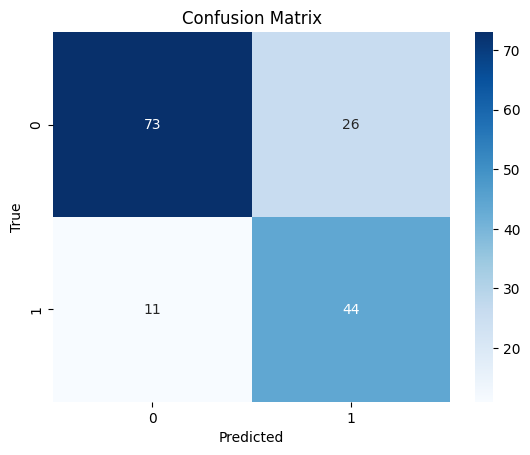

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_f1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


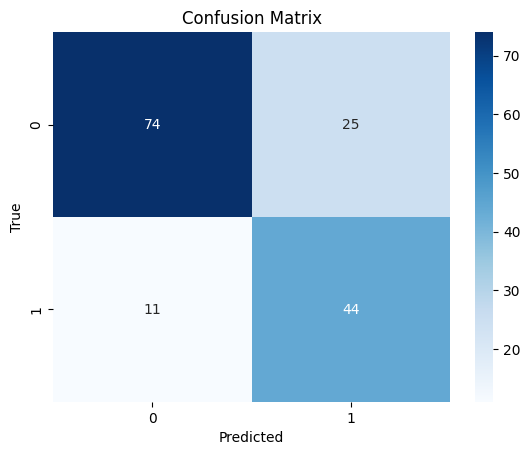

In [30]:
cm1 = [[74, 25],[11, 44]]


sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [5]:
X_test_final_bias = pd.DataFrame(X_test_final, columns=X.columns)

In [8]:
X_test_final_bias

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,age_group
0,-0.714020,-0.617127,0.817110,0.934749,0.260736,6.0,0.430,43.0,Old
1,-0.276643,0.301916,0.752265,-0.701206,0.480535,2.0,0.148,21.0,Young
2,-0.401608,-0.292759,-1.322774,-0.701206,-0.153005,2.0,0.158,21.0,Young
3,-0.432849,0.572222,-1.322774,-0.701206,-0.954627,8.0,0.856,34.0,Adult
4,0.473147,1.112835,-1.322774,-0.701206,-0.269369,7.0,0.210,50.0,Old
...,...,...,...,...,...,...,...,...,...
149,1.379144,1.004713,-1.322774,-0.701206,-0.204722,9.0,0.302,49.0,Old
150,-1.370087,-0.725249,0.622575,-0.219029,0.170230,1.0,1.251,24.0,Young
151,-0.807744,0.139732,-1.322774,-0.701206,0.622758,8.0,0.485,57.0,Old
152,0.785560,0.031609,1.141335,2.398498,-0.515028,2.0,0.337,29.0,Adult


In [7]:
# Example: Use percentiles or quantiles for binning
X_test_final_bias['age_group'] = pd.qcut(X_test_final_bias['Age'], q=3, labels=['Young', 'Adult', 'Old'])


In [23]:
for group in X_test_final_bias["age_group"].unique():
    idx = X_test_final_bias["age_group"] == group
    y_true = y_test.values[idx.values]
    y_pred_group = y_pred_f1[idx.values]
    print(f"\nGroup: {group}")
    print("Recall:", recall_score(y_true, y_pred_group))
    print("Precision:", precision_score(y_true, y_pred_group))
    print("F1:", f1_score(y_true, y_pred_group))



Group: Old
Recall: 0.8947368421052632
Precision: 0.5
F1: 0.6415094339622641

Group: Young
Recall: 0.5454545454545454
Precision: 0.6
F1: 0.5714285714285714

Group: Adult
Recall: 0.84
Precision: 0.8076923076923077
F1: 0.8235294117647058


In [62]:
X_test_final_bias[X_test_final_bias["age_group"] == "Young"]["Pregnancies"].describe()


count    53.000000
mean     -0.327336
std       0.919573
min      -1.651258
25%      -1.026433
50%      -0.495332
75%       0.316941
max       1.879004
Name: Pregnancies, dtype: float64

In [63]:
X_test_final_bias[X_test_final_bias["age_group"] == "Adult"]["Pregnancies"].describe()


count    52.000000
mean      0.160134
std       1.024089
min      -1.432569
25%      -0.604676
50%      -0.120437
75%       0.973007
max       2.128934
Name: Pregnancies, dtype: float64

In [65]:
X_test_final_bias[X_test_final_bias["age_group"] == "Old"]["Pregnancies"].describe()


count    49.000000
mean      0.203452
std       0.965676
min      -1.838706
25%      -0.526573
50%       0.160735
75%       0.910525
max       2.378864
Name: Pregnancies, dtype: float64

In [2]:
import pandas as pd
_, bins = pd.qcut(X_test_final_bias['Age'], q=3, labels=['Young', 'Adult', 'Old'], retbins=True)
print(bins)


NameError: name 'X_test_final_bias' is not defined

In [69]:
X_test_final_bias["age_group"].value_counts()


age_group
Young    53
Adult    52
Old      49
Name: count, dtype: int64

In [43]:
import joblib
joblib.dump(rf_f1, "rf_f1.pkl")

['rf_f1.pkl']

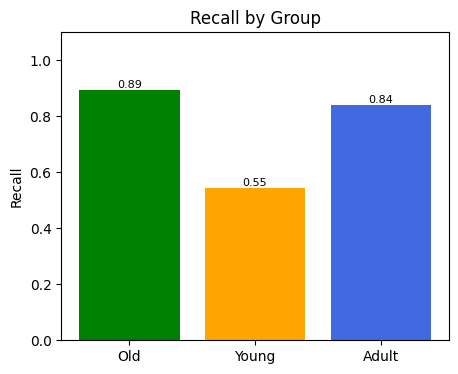

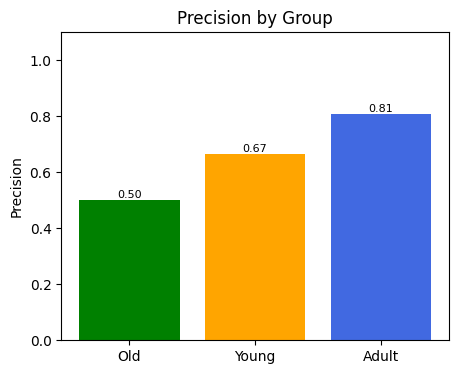

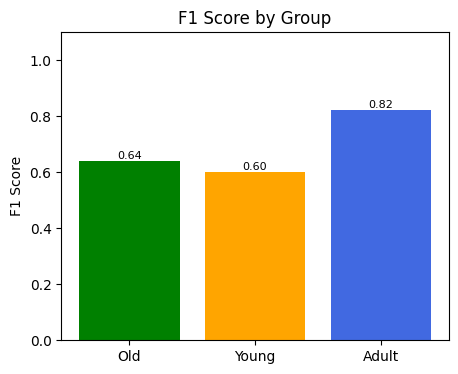

In [3]:
import matplotlib.pyplot as plt
groups = ['Old', 'Young', 'Adult']
recall = [0.8947368421052632, 0.5454545454545454, 0.84]
precision = [0.5, 0.6666666666666666, 0.8076923076923077]
f1 = [0.6415094339622641, 0.6, 0.8235294117647058]

# Define a consistent color for each group
group_colors = {
    'Old': 'green',
    'Young': 'orange',
    'Adult': 'royalblue'
}
colors = [group_colors[group] for group in groups]

# Recall
fig, ax = plt.subplots(figsize=(5,4))
bars = ax.bar(groups, recall, color=colors)
ax.set_ylim(0, 1.1)
ax.set_title('Recall by Group')
ax.set_ylabel('Recall')
ax.bar_label(bars, fmt="%.2f", fontsize=8)
plt.show()

# Precision
fig, ax = plt.subplots(figsize=(5,4))
bars = ax.bar(groups, precision, color=colors)
ax.set_ylim(0, 1.1)
ax.set_title('Precision by Group')
ax.set_ylabel('Precision')
ax.bar_label(bars, fmt="%.2f", fontsize=8)
plt.show()

# F1
fig, ax = plt.subplots(figsize=(5,4))
bars = ax.bar(groups, f1, color=colors)
ax.set_ylim(0, 1.1)
ax.set_title('F1 Score by Group')
ax.set_ylabel('F1 Score')
ax.bar_label(bars, fmt="%.2f", fontsize=8)
plt.show()

In [70]:
rf_f1.feature_importances_

array([0.38244805, 0.01752318, 0.02166501, 0.03379308, 0.22207223,
       0.05044359, 0.06086578, 0.21118909])

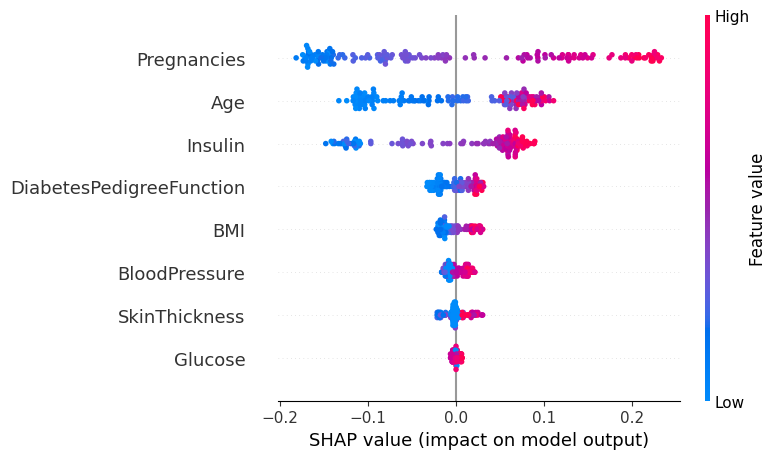

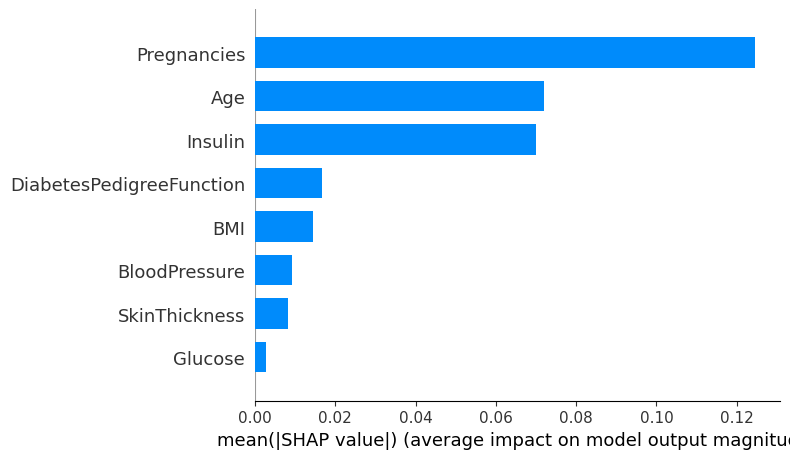

In [24]:
import shap
X_test_final_pd = pd.DataFrame(X_test_final, columns=X.columns)
explainer_rf_f1 = shap.Explainer(rf_f1, X_test_final_pd)

shap_values_rf_f1 = explainer_rf_f1(X_test_final_pd)
shap.summary_plot(shap_values_rf_f1[:, :, 1], X_test_final_pd)
shap.summary_plot(shap_values_rf_f1[:, :, 1], X_test_final_pd, plot_type="bar")
